To-Do
- Specify procedure for outliers (additional?)
- Check standardization of features
- Interaction Terms for protected attributes

# Data Cleaning and EDA - Continued

This notebook picks up where the first analysis notebook has ended, after value imputation and preliminary outlier removal. The pickle saved at the end of the first workbook will be the starting point here.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
    
sns.set_theme(style="darkgrid", context= "paper")

In [14]:
HMDA_clean = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/processed/HMDA_cleaned.pkl")

## Additional Typecasting

In the previous notebook, the only aim of adjusting the data types was to get all of them in a numerical format in order to facilitate imputation and analysis. Now, the data types will be cast to their correct format.

In [15]:
str_cols = ["county_code"]
cat_cols = ["conforming_loan_limit", "action_taken", "purchaser_type", "preapproval", "loan_type", "loan_purpose", "lien_status", "reverse_mortgage", "open-end_line_of_credit", "business_or_commercial_purpose",
            "hoepa_status", "negative_amortization", "interest_only_payment", "balloon_payment", "other_nonamortizing_features", "occupancy_type", "manufactured_home_secured_property_type", "manufactured_home_land_property_interest", "total_units", 
            "applicant_credit_score_type", "applicant_ethnicity-1", "applicant_ethnicity-2",
            "applicant_ethnicity_observed", "applicant_race-1",	"applicant_race-2",	"applicant_race_observed", "applicant_sex",	"applicant_sex_observed", "applicant_age", "submission_of_application", "initially_payable_to_institution", "aus-1"]

In [16]:
HMDA_clean[str_cols] = HMDA_clean[str_cols].round(0).astype("str")
HMDA_clean[cat_cols] = HMDA_clean[cat_cols].astype("category")

## Target Variable Specification

Currently, the categorical **action_taken** includes information on the target variable. This will be removed and a new binary variable **loan_granted** will be created. This variable will be used for classification purposes.

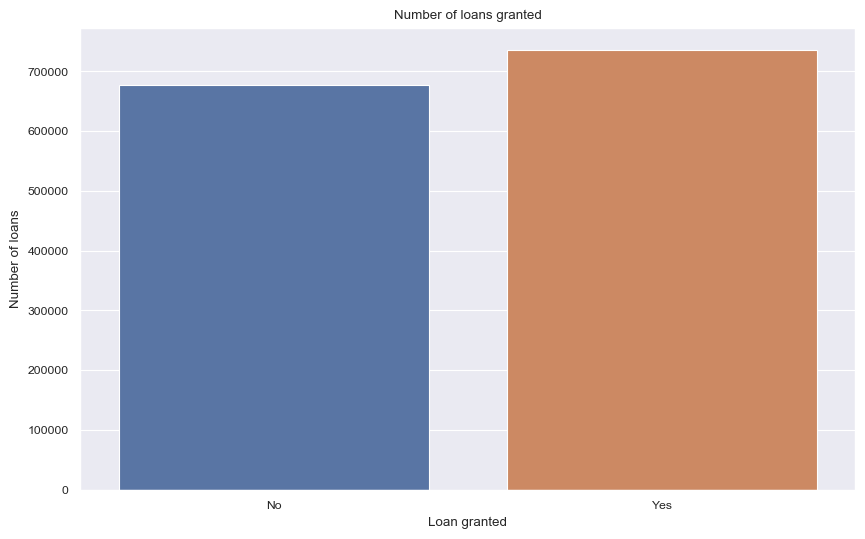

In [17]:
HMDA_clean["loan_granted"] = HMDA_clean["action_taken"].apply(lambda x: 1 if x == 1 else 0)
HMDA_clean = HMDA_clean.drop(columns = "action_taken")
HMDA_clean["loan_granted"] = HMDA_clean["loan_granted"].astype("category")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.countplot(x = "loan_granted", data = HMDA_clean, ax = ax)
ax.set_title("Number of loans granted")
ax.set_xlabel("Loan granted")
ax.set_ylabel("Number of loans")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Not Granted"
labels[1] = "Granted"
ax.set_xticklabels(labels)
plt.show()